In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# run this command too - just to allow more data to be displayed than default
pd.set_option('display.max_rows', 200)
# this one ensures graphs properly display in the notebook
%matplotlib inline

In [2]:
#put the data into a dataframe
data = pd.read_csv('Data/Clustering_Results/clusterlabels_cleaneddata.csv')
#check that is has been read correctly
data

,Unnamed: 0,MSOA,Bus_stops,Train_stations,metro_stations,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,...,log_idr_DB_cluster,log_idr_kmeans_cluster,log_idr_H_cluster,yj_idr_DB_cluster,yj_idr_H_cluster,yj_H_cluster,yj_Kmeans_cluster,yj_Zscore_DB_cluster,yj_Zscore_H_cluster,yj_zscore_Kmeans_cluster
0,1,E02000001,168.0,8.0,12.0,30.604333,14.649948,18.390805,5.433647,5.538140,...,-1,0,1,0,0,2,3,-1,1,2
1,2,E02000002,20.0,NaN,NaN,62.403244,6.400966,15.660225,8.212560,14.734300,...,0,0,1,0,0,3,3,0,1,2
2,3,E02000003,18.0,NaN,NaN,68.805425,6.895792,12.778145,19.850187,10.619079,...,0,0,1,0,0,3,3,0,1,2
3,4,E02000004,13.0,NaN,NaN,76.013805,6.368090,10.146956,13.750875,9.972008,...,0,0,1,0,0,3,3,0,1,2
4,5,E02000005,10.0,NaN,NaN,66.069746,6.286509,12.406120,12.294854,15.076495,...,0,0,1,0,0,3,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,7197,W02000419,68.0,NaN,NaN,78.594455,8.073744,0.021191,1.292647,3.390549,...,0,3,0,0,1,0,0,0,0,0
7197,7198,W02000420,107.0,NaN,NaN,89.725659,13.338290,0.148699,0.832714,3.568773,...,0,1,2,0,1,0,2,0,2,1
7198,7199,W02000421,130.0,NaN,7.0,89.238114,24.655573,0.107354,0.339953,1.789229,...,-1,3,2,0,2,2,2,5,2,1
7199,7200,W02000422,52.0,NaN,NaN,82.430213,6.057363,0.064212,4.965753,8.005137,...,0,2,4,-1,2,0,0,0,0,0


In [3]:
# list(data) or 
list(data.columns) 

['Unnamed: 0',
 'MSOA',
 'Bus_stops',
 'Train_stations',
 'metro_stations',
 'HH_owning_cars_perc',
 'work_from_home_perc',
 'underground_metro_perc',
 'train_perc',
 'bus_perc',
 'taxi_perc',
 'motorcycle_perc',
 'bicycle_perc',
 'on_foot_perc',
 'other_perc',
 'avg_time_from_origin_car_UNWEIGHTED',
 'avg_time_car',
 'avg_time_from_origin_bus_UNWEIGHTED',
 'avg_time_bus',
 'avg_time_from_origin_rail_UNWEIGHTED',
 'avg_time_rail',
 'car_perc',
 'yj_idr_Kmeans_cluster',
 'yj_DB_cluster',
 'log_zscore_DB_cluster',
 'log_zscore_kmeans_cluster',
 'log_zscore_H_cluster',
 'log_range_DB_cluster',
 'log_range_H_cluster',
 'log_range_kmeans_cluster',
 'log_idr_DB_cluster',
 'log_idr_kmeans_cluster',
 'log_idr_H_cluster',
 'yj_idr_DB_cluster',
 'yj_idr_H_cluster',
 'yj_H_cluster',
 'yj_Kmeans_cluster',
 'yj_Zscore_DB_cluster',
 'yj_Zscore_H_cluster',
 'yj_zscore_Kmeans_cluster']

In [4]:
cluster_data = data[['yj_idr_Kmeans_cluster',
 'yj_DB_cluster',
 'log_zscore_DB_cluster',
 'log_zscore_kmeans_cluster',
 'log_zscore_H_cluster',
 'log_range_DB_cluster',
 'log_range_H_cluster',
 'log_range_kmeans_cluster',
 'log_idr_DB_cluster',
 'log_idr_kmeans_cluster',
 'log_idr_H_cluster',
 'yj_idr_DB_cluster',
 'yj_idr_H_cluster',
 'yj_H_cluster',
 'yj_Kmeans_cluster',
 'yj_Zscore_DB_cluster',
 'yj_Zscore_H_cluster',
 'yj_zscore_Kmeans_cluster']]
cluster_data

,yj_idr_Kmeans_cluster,yj_DB_cluster,log_zscore_DB_cluster,log_zscore_kmeans_cluster,log_zscore_H_cluster,log_range_DB_cluster,log_range_H_cluster,log_range_kmeans_cluster,log_idr_DB_cluster,log_idr_kmeans_cluster,log_idr_H_cluster,yj_idr_DB_cluster,yj_idr_H_cluster,yj_H_cluster,yj_Kmeans_cluster,yj_Zscore_DB_cluster,yj_Zscore_H_cluster,yj_zscore_Kmeans_cluster
0,0,-1,-1,3,0,-1,1,0,-1,0,1,0,0,2,3,-1,1,2
1,0,0,0,3,2,0,1,0,0,0,1,0,0,3,3,0,1,2
2,0,0,0,3,2,0,1,0,0,0,1,0,0,3,3,0,1,2
3,0,0,0,3,2,0,1,0,0,0,1,0,0,3,3,0,1,2
4,0,0,0,3,2,0,1,0,0,0,1,0,0,3,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,1,0,0,2,1,0,0,3,0,3,0,0,1,0,0,0,0,0
7197,1,0,0,1,1,0,2,1,0,1,2,0,1,0,2,0,2,1
7198,2,6,-1,2,0,-1,2,3,-1,3,2,0,2,2,2,5,2,1
7199,2,-1,0,0,1,0,4,2,0,2,4,-1,2,0,0,0,0,0


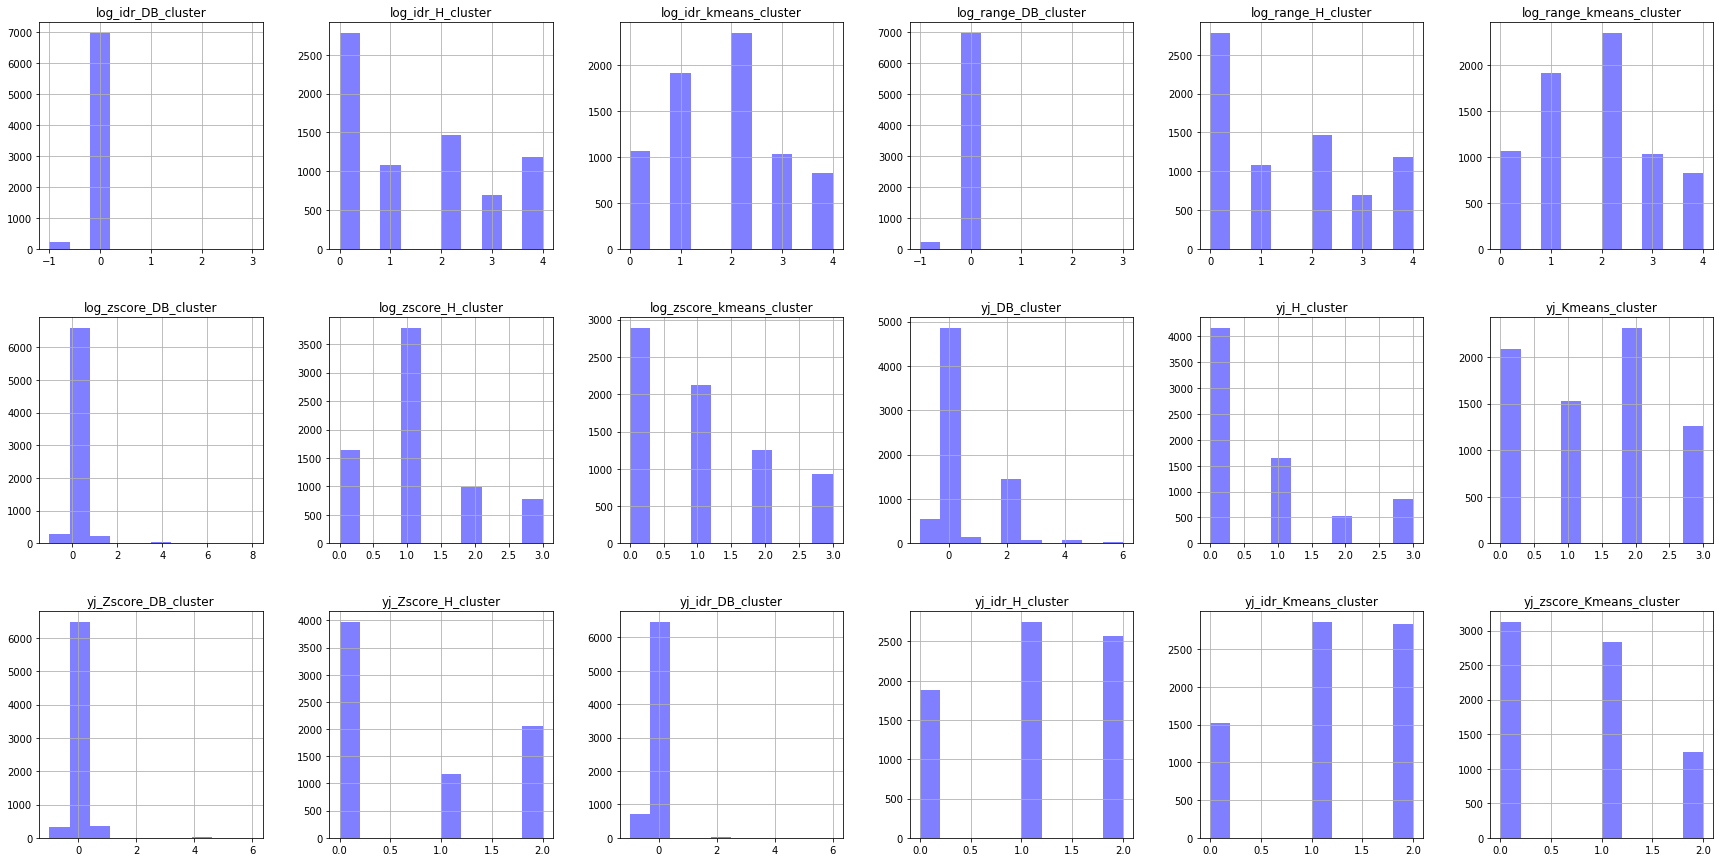

In [5]:
#plot the results
cluster_data.hist(layout=(3, 6), figsize=(30, 15), color='blue', alpha=.5);

In [6]:
# drop the clusters with bad distributions (bad to be defined more explicitly later...or not. Whatever)
data.drop(['Unnamed: 0', 'log_idr_DB_cluster', 'log_zscore_DB_cluster', 'yj_Zscore_DB_cluster',
           'yj_idr_DB_cluster', 'log_range_DB_cluster', 'yj_Zscore_H_cluster', 
           'yj_DB_cluster'], axis=1, inplace=True)

list(data.columns) 

['MSOA',
 'Bus_stops',
 'Train_stations',
 'metro_stations',
 'HH_owning_cars_perc',
 'work_from_home_perc',
 'underground_metro_perc',
 'train_perc',
 'bus_perc',
 'taxi_perc',
 'motorcycle_perc',
 'bicycle_perc',
 'on_foot_perc',
 'other_perc',
 'avg_time_from_origin_car_UNWEIGHTED',
 'avg_time_car',
 'avg_time_from_origin_bus_UNWEIGHTED',
 'avg_time_bus',
 'avg_time_from_origin_rail_UNWEIGHTED',
 'avg_time_rail',
 'car_perc',
 'yj_idr_Kmeans_cluster',
 'log_zscore_kmeans_cluster',
 'log_zscore_H_cluster',
 'log_range_H_cluster',
 'log_range_kmeans_cluster',
 'log_idr_kmeans_cluster',
 'log_idr_H_cluster',
 'yj_idr_H_cluster',
 'yj_H_cluster',
 'yj_Kmeans_cluster',
 'yj_zscore_Kmeans_cluster']

In [7]:
# create list of columns
cluster_columns = ['yj_idr_Kmeans_cluster', 'log_zscore_kmeans_cluster', 'log_zscore_H_cluster', 'log_range_H_cluster',
           'log_range_kmeans_cluster', 'log_idr_kmeans_cluster.x', 'log_idr_H_cluster.x', 'yj_idr_H_cluster',
           'yj_H_cluster', 'yj_Kmeans_cluster', 'yj_zscore_Kmeans_cluster']

cluster_columns[1]    

'log_zscore_kmeans_cluster'

## log_zscore_kmeans_cluster

In [8]:
x1 = data.groupby(cluster_columns[1], as_index=False).mean()
# remove the cluster results (keep the one you are grouping by!)
x1.drop(['yj_idr_Kmeans_cluster','log_zscore_H_cluster','log_range_H_cluster','log_range_kmeans_cluster',
        'log_idr_kmeans_cluster', 'log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster','yj_Kmeans_cluster',
        'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)
x1

,log_zscore_kmeans_cluster,Bus_stops,Train_stations,metro_stations,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,taxi_perc,...,bicycle_perc,on_foot_perc,other_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,0,38.019357,1.126786,1.736434,70.390136,7.496898,0.539719,3.465183,9.374460,0.740703,...,3.094778,11.927117,0.453144,120.770862,10.371186,271.627304,24.343087,145.498927,55.101332,62.163032
1,1,41.743759,1.284345,1.222222,88.228159,14.140457,0.554996,4.902157,2.591027,0.210789,...,1.832875,6.258221,0.409819,122.649747,14.184940,268.807528,33.313469,153.320601,78.454091,68.409594
2,2,47.452514,1.448864,2.266667,76.047423,11.316116,0.750912,1.521501,5.463170,0.486134,...,2.241481,11.465166,0.730514,182.808596,14.001265,387.682898,31.425312,223.029559,116.332285,65.250853
3,3,20.455914,1.318681,1.512605,57.446422,9.513224,22.088353,12.396857,14.138778,0.459653,...,3.922032,8.777092,0.531712,108.881259,9.521434,246.343598,28.749404,114.984162,21.002459,27.104747


In [9]:
#change from wide to long for plotting
y1 = x1.unstack().reset_index() 
y1.head()

,level_0,level_1,0
0,log_zscore_kmeans_cluster,0,0.000000
1,log_zscore_kmeans_cluster,1,1.000000
2,log_zscore_kmeans_cluster,2,2.000000
3,log_zscore_kmeans_cluster,3,3.000000
4,Bus_stops,0,38.019357


In [10]:
# remove the top rows with the cluster name
y1 = y1[y1.level_0 != cluster_columns[1]]
# rename columns 
y1.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)


y1.head()

,variable,cluster,0
4,Bus_stops,0,38.019357
5,Bus_stops,1,41.743759
6,Bus_stops,2,47.452514
7,Bus_stops,3,20.455914
8,Train_stations,0,1.126786


/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


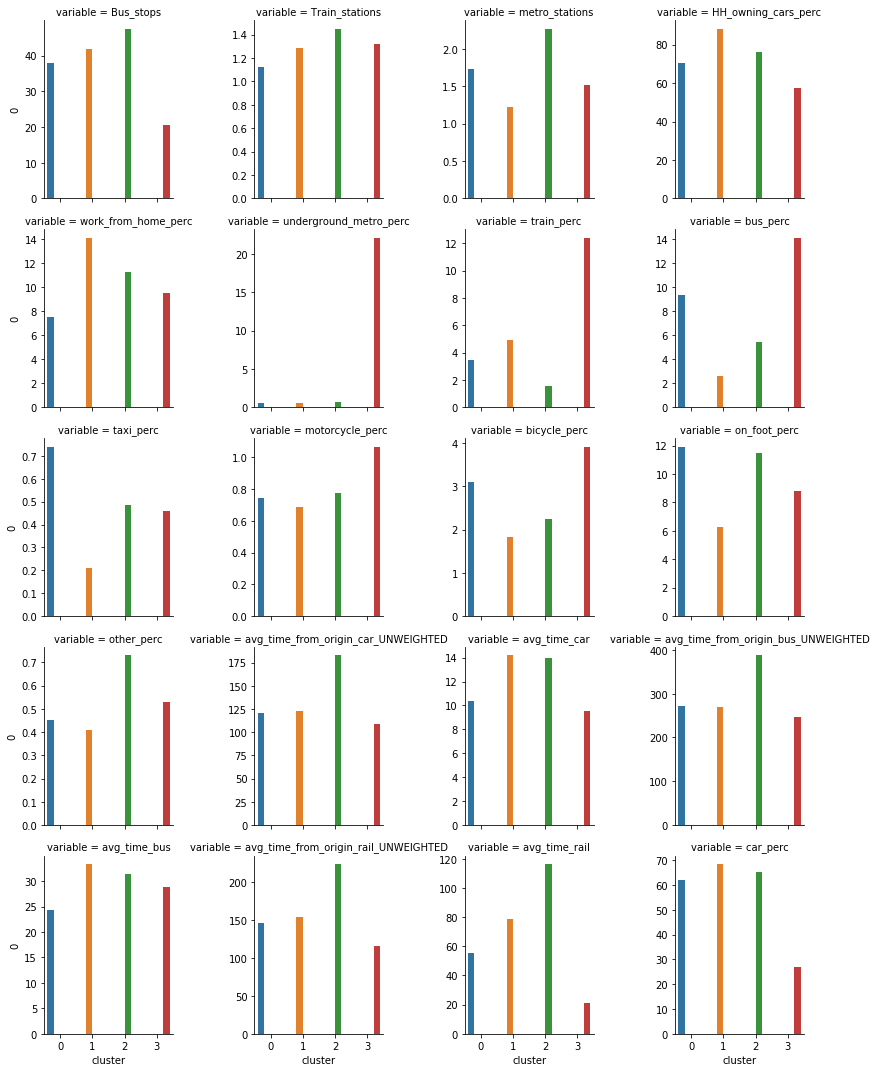

In [11]:
import seaborn as sns
g = sns.catplot(data=y1, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

In [12]:
cluster_columns[2]    

'log_zscore_H_cluster'

## log_zscore_H_cluster

In [13]:
x2 = data.groupby(cluster_columns[2], as_index=False).mean()
# remove the cluster results
x2.drop(['log_zscore_kmeans_cluster','yj_idr_Kmeans_cluster','log_range_H_cluster','log_range_kmeans_cluster',
         'log_idr_kmeans_cluster', 'log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster','yj_Kmeans_cluster',
         'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)
x2

,log_zscore_H_cluster,Bus_stops,Train_stations,metro_stations,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,taxi_perc,...,bicycle_perc,on_foot_perc,other_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,0,39.442002,1.176056,2.461847,65.684740,7.390979,1.860200,2.659620,11.240816,0.896853,...,2.630501,12.223481,0.510565,119.917684,10.338568,273.077030,25.081977,144.733739,44.907359,59.913397
1,1,40.812187,1.344115,1.000000,82.218568,11.810425,0.278303,4.217309,4.320598,0.338490,...,2.637925,9.117078,0.437360,128.335823,13.065628,281.019964,29.966485,158.435048,79.973441,66.097635
2,2,20.573869,1.217712,1.000000,61.898669,9.633516,19.503479,12.751714,13.135683,0.490420,...,3.524274,7.666077,0.501971,109.201650,9.402345,248.260006,28.630922,116.235929,22.591291,31.722345
3,3,48.126452,1.013986,1.000000,75.850335,10.671663,0.925317,1.077973,6.134144,0.498956,...,1.916631,10.463694,0.770331,191.591276,13.800779,402.168287,31.080488,231.553140,113.413322,66.779091


In [14]:
#change from wide to long for plotting
y2 = x2.unstack().reset_index() 

In [15]:
# remove the top rows with the cluster name
y2 = y2[y2.level_0 != cluster_columns[2]]
# rename columns 
y2.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y2.head()

,variable,cluster,0
4,Bus_stops,0,39.442002
5,Bus_stops,1,40.812187
6,Bus_stops,2,20.573869
7,Bus_stops,3,48.126452
8,Train_stations,0,1.176056


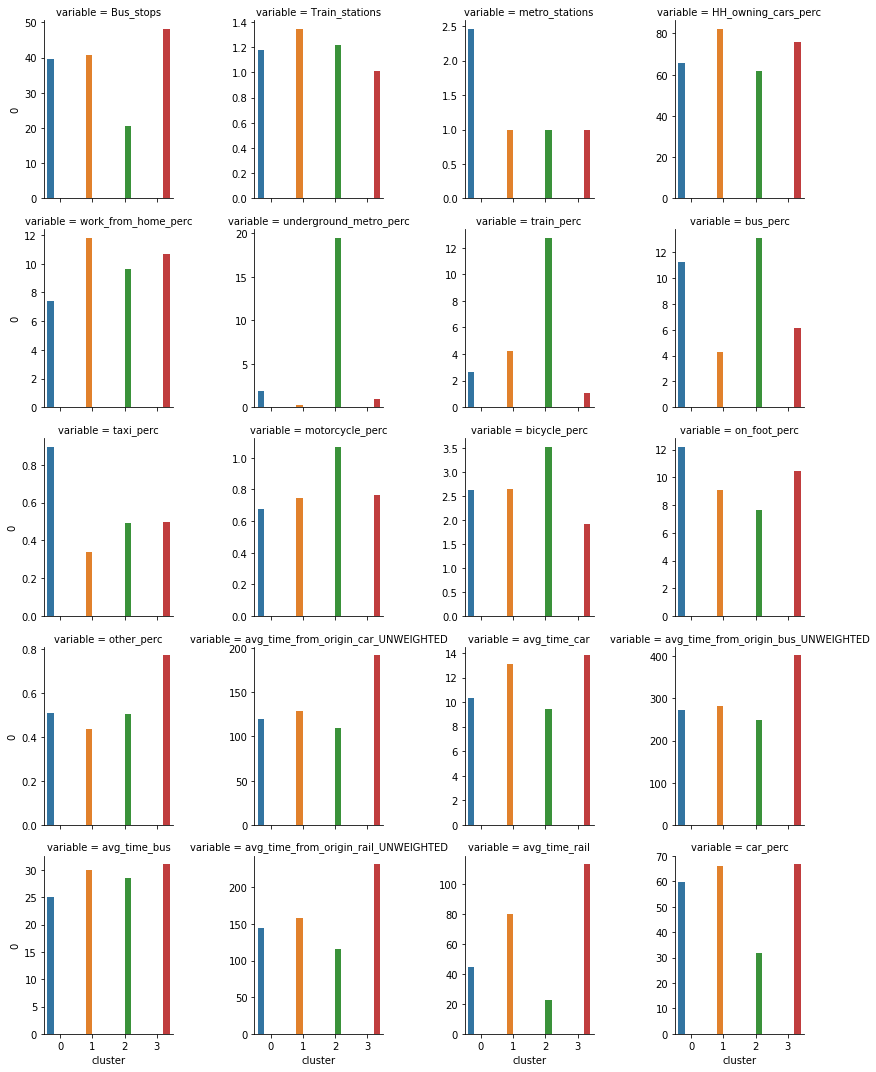

In [16]:
import seaborn as sns
g = sns.catplot(data=y2, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)